In [2]:
def bracket_filter(sentence: str, mode: str = 'phonetic') -> str:
    # bracket 괄호를 제거 & phonetic or spelling 중 하나만 택
    new_sentence = ""

    if mode == "phonetic":
        flag = False
        for ch in sentence: 
            if ch == '(' and flag is False:
                flag = True

            elif ch == "(" and flag is True:
                flag = False

            elif ch != ')' and flag is False:
                new_sentence += ch

    elif mode == "spelling":
        flag = True
        for ch in sentence:
            if ch == "(":
                continue

            elif ch == ")" and flag is True:
                flag = False 

            elif ch == ")" and flag is False:
                flag = True
            
            elif ch != ')' and flag is True:
                new_sentence += ch

    else:
        raise ValueError(f"Unsupported mode : {mode}")

    return new_sentence



text = "b/ (70%)/(칠 십 퍼센트) 확률이라니 아/ (뭐+ 뭔)/(모+ 몬) 소리야 진짜 (100%)(백 프로)가 왜 안돼? n/"
mode = "phonetic"
print(mode, ": ", bracket_filter(text, mode))
mode = "spelling"
print(mode, ": ", bracket_filter(text, mode))

phonetic :  b/ 칠 십 퍼센트 확률이라니 아/ 모+ 몬 소리야 진짜 백 프로가 왜 안돼? n/
spelling :  b/ 70% 확률이라니 아/ 뭐+ 뭔 소리야 진짜 100%가 왜 안돼? n/


In [ ]:
# 음성 칠 십 퍼센트 

(70%)/(칠 십)

In [8]:
import re 

def special_filter(sentence: str, mode: str = 'phonetic', replace: str = None) -> str:
    # 특수문자 제거 
    # 숫자가 포함되어 있는 부분 어떻게 읽는지
    print(sentence)
    SENTENCE_MARK = ['?', '!', '.']
    NOISE = ['o', 'n', 'u', 'b', 'l']
    EXCEPT = ['/', '+', '*', '-', '@', '$', '^', '&', '[', ']', '=', ':', ';', ',']

    new_sentence = ""

    for idx, ch in enumerate(sentence):
        if ch not in SENTENCE_MARK and idx+1 < len(sentence) and ch in NOISE and sentence[idx + 1] == "/":
            # character가 sentence_mark에 포함되지 않고 idx가 마지막 character이고, ch가 노이즈이고, 마지막이 "/"이거 일때 무시
            continue

        if ch == "#":
            new_sentence += "샾"

        elif ch == "%":
            if mode == "phonetic":
                new_sentence += replace

            else:
                new_sentence += "%"

        elif ch not in EXCEPT:
            new_sentence += ch

    pattern = re.compile(r'\s\s+')
    new_sentence = re.sub(pattern, ' ', new_sentence.strip())
    return new_sentence
    

# text = "b/ (70%)/(칠 십 퍼센트) 확률이라니 아/ (뭐+ 뭔)/(모+ 몬) 소리야 진짜 (100%)(백 프로)가 왜 안돼? n/"
text = "o/ 근데* 대부분 다 암 치료하는 환자들이 b/ (90)/(구십) 몇 % 다 보니까 b/ 많이 아프신 분들 밖에 안 온단 말이야. b/"
mode = "phonetic"
print(mode, ": ", special_filter(bracket_filter(text, mode), mode, "퍼센트"))
mode = "spelling"
print(mode, ": ", special_filter(bracket_filter(text, mode), mode, ))

o/ 근데* 대부분 다 암 치료하는 환자들이 b/ 구십 몇 % 다 보니까 b/ 많이 아프신 분들 밖에 안 온단 말이야. b/
phonetic :  근데 대부분 다 암 치료하는 환자들이 구십 몇 퍼센트 다 보니까 많이 아프신 분들 밖에 안 온단 말이야.
o/ 근데* 대부분 다 암 치료하는 환자들이 b/ 90 몇 % 다 보니까 b/ 많이 아프신 분들 밖에 안 온단 말이야. b/
spelling :  근데 대부분 다 암 치료하는 환자들이 90 몇 % 다 보니까 많이 아프신 분들 밖에 안 온단 말이야.


In [4]:
from src.preprocess.preprocess import prepross_kspon
output_unit = "grapheme"
prepross_kspon(
    dataset_path="./datasets/kspon/train",
    output_unit=output_unit,   # [character, subword, grapheme]
    save_path=f"./Vocabulary/kspon_{output_unit}",
    preprocess_mode="phonetic", # [spelling, phonetic]
    vocab_size=5000
)

In [2]:
lst = ["1", "2", "3"]

",".join(lst)

'1,2,3'

In [5]:
import unicodedata


transcript = "안녕하세요"
" ".join(unicodedata.normalize('NFKD', transcript).replace(' ', '|')).upper().split()

['ᄋ', 'ᅡ', 'ᆫ', 'ᄂ', 'ᅧ', 'ᆼ', 'ᄒ', 'ᅡ', 'ᄉ', 'ᅦ', 'ᄋ', 'ᅭ']

In [6]:
from torch import Tensor, FloatTensor

In [8]:
print(Tensor([3]).dtype)
print(FloatTensor([3]).dtype)

torch.float32
torch.float32


In [1]:
import torch 
from src.audio.core import load_audio
from src.audio.feature import Spectrogram, MelSpectrogram
import matplotlib.pyplot as plt
import librosa, librosa.display

FIG_SIZE = (5, 3)



[-32. -32. -29. ...  -3.  -1.   4.]


Text(0.5, 1.0, 'Waveform')

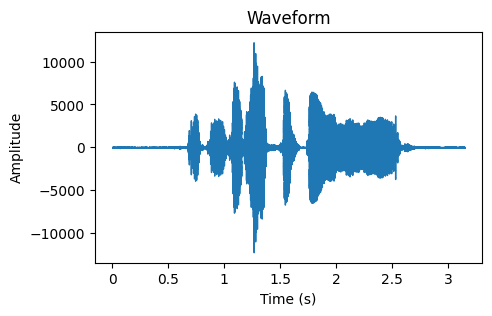

In [2]:
signal = load_audio("datasets/kspon/train/KsponSpeech_01/KsponSpeech_0001/KsponSpeech_000001.pcm")
print(signal)



plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sr=16000)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

audio process
- kaldi
- torch audio
- librosa

log(sqrt(a^2 + b^2))

In [12]:
import torchaudio 
import numpy as np 
transform = torchaudio.compliance.kaldi.spectrogram
frame_length = 20
frame_shift = 10
sr = 16000
n_fft = int(round(sr * 0.001 * frame_length))
hop_length = int(round(sr * 0.001 * frame_shift))
spectrogram = torch.stft(
                Tensor(signal), n_fft, hop_length=hop_length,
                win_length=n_fft, window=torch.hamming_window(n_fft),
                center=False, normalized=False, onesided=True, return_complex=False
            )
spectrogram = (spectrogram[:, :, 0].pow(2) + spectrogram[:, :, 1].pow(2)).pow(0.5)
spectrogram = np.log1p(spectrogram.numpy())
spectrogram


array([[7.7479534, 7.2839003, 5.4467435, ..., 4.5497956, 6.8387733,
        5.765651 ],
       [8.008444 , 7.145674 , 6.7368684, ..., 5.2588   , 6.613811 ,
        6.2626157],
       [7.4599257, 6.8878117, 7.1794   , ..., 6.242593 , 6.0848107,
        6.2971005],
       ...,
       [1.7056956, 1.2609904, 2.4046283, ..., 1.8780454, 1.6742493,
        1.7619954],
       [1.46455  , 1.4625578, 2.2653537, ..., 1.9565195, 1.0062436,
        2.1614623],
       [2.0029175, 1.4357412, 2.6044588, ..., 1.6355549, 1.8071835,
        2.601011 ]], dtype=float32)

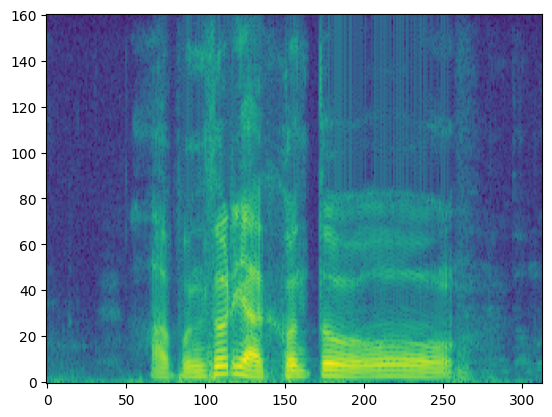

In [13]:
transforms = Spectrogram(sr=16000)
spec = torch.Tensor(transforms(signal))

if spec.dim() == 3:
    spec = spec[0]
plt.imshow(spec.detach().cpu().numpy(), origin="lower", aspect="auto")
plt.show()



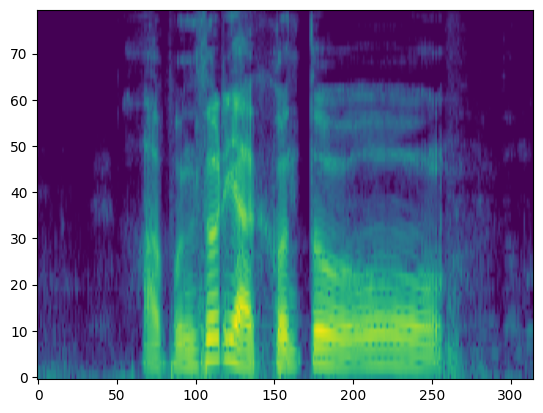

In [14]:

transforms = MelSpectrogram(sr=16000, n_mels=80, frame_length=20, frame_shift=10, feature_extract_by='librosa')
mel_spec = torch.Tensor(transforms(signal))

if mel_spec.dim() == 3:
    mel_spec = mel_spec[0]
plt.imshow(mel_spec.detach().cpu().numpy(), origin="lower", aspect="auto")
plt.show()



/Users/jeonghwanseog/Desktop/study/speech_transformer_pl/.venv/lib/python3.9/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (80) may be set too high. Or, the value for `n_freqs` (161) may be set too low.
  warnings.warn(


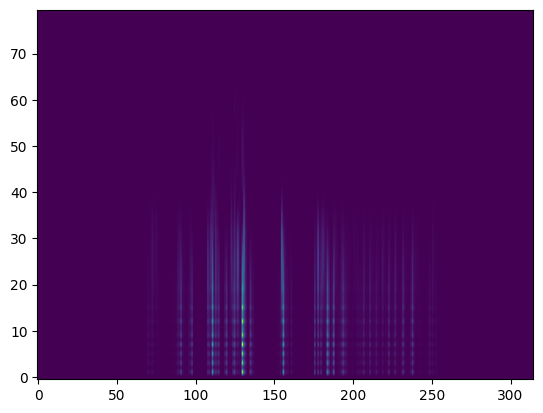

In [5]:
# amplitude_to_DB 미적용 
transforms = MelSpectrogram(sr=16000, n_mels=80, frame_length=20, frame_shift=10, feature_extract_by='torchaudio')
mel_spec = torch.Tensor(transforms(signal))

if mel_spec.dim() == 3:
    mel_spec = mel_spec[0]
plt.imshow(mel_spec.detach().cpu().numpy(), origin="lower", aspect="auto")
plt.show()



/Users/jeonghwanseog/Desktop/study/speech_transformer_pl/.venv/lib/python3.9/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (80) may be set too high. Or, the value for `n_freqs` (161) may be set too low.
  warnings.warn(


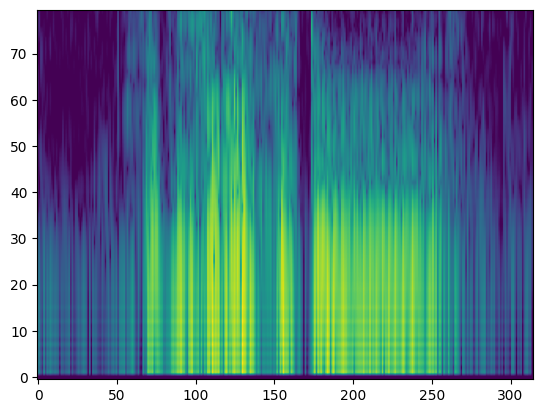

In [5]:
# amplitude_to_DB 적용 
transforms = MelSpectrogram(sr=16000, n_mels=80, frame_length=20, frame_shift=10, feature_extract_by='torchaudio')
mel_spec = torch.Tensor(transforms(signal))

if mel_spec.dim() == 3:
    mel_spec = mel_spec[0]
plt.imshow(mel_spec.detach().cpu().numpy(), origin="lower", aspect="auto")
plt.show()



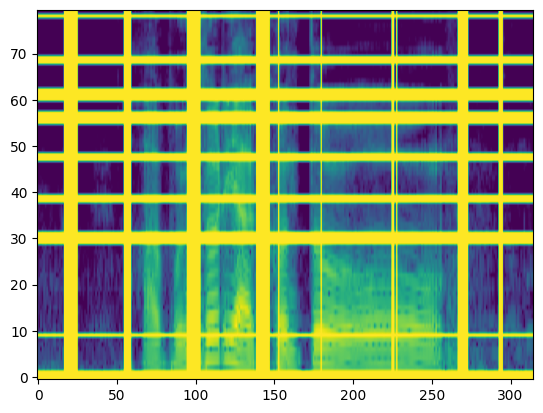

In [20]:
from src.audio.augment import SpecAugment

spec_augment = SpecAugment(12, 2, 2)
aug_spec = spec_augment(mel_spec)

if aug_spec.dim() == 3:
    aug_spec = mel_spec[0]
plt.imshow(aug_spec.detach().cpu().numpy(), origin="lower", aspect="auto")
plt.show()


In [ ]:
영어 문장 -> 스페인어 문장 
a b c d -> a' b' c' d'
d c b a -> a' b' c' d'


In [ ]:
audio 10만개
[0] * 100000 + [1] * 1000000

data_path, augment_method: int

augment_method == 1

In [22]:
a, b, c = [1, 2, 3], [4, 5, 6], [7, 8, 9]
# 첫번쨰 1 - 4 - 7
# 두번쨰 2 - 5 - 8
# 세번쨰 3 - 6 - 9


tmp = list(zip(a, b, c))
print(tmp)
import random
random.shuffle(tmp)
print(tmp)
a, b, c = zip(*tmp)
print(a, b, c)
# 첫번째 3 - 6 - 9
# 두번째 1 - 4 - 7
# 세번쨰 2 - 5 - 8

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]
[(3, 6, 9), (1, 4, 7), (2, 5, 8)]
(3, 1, 2) (6, 4, 5) (9, 7, 8)


In [ ]:
a = audio_paths = ["1번 오디오 path", "2번 오디오 path", "3번 오디오 path"]
b = transcript_paths = ["1번 transcript path", "2번 transcript path", "3번 transcript path"]

In [3]:
import sentencepiece as spm
sp = spm.SentencePieceProcessor()
sp.load("Vocabulary/kspon_subword/kspon_sentencepiece.model")
sp.GetPieceSize()

5000

In [5]:
from src.vocab import Vocabulary
import numpy as np

vocab = Vocabulary("Vocabulary/kspon_subword/kspon_sentencepiece.model", "subword")

vocab.label2string(np.array([1, 2, 3]))

' ⁇ '

In [2]:
sp.GetPieceSize

NameError: name 'sp' is not defined

In [2]:
# kernel: 
# stride: 

# padding:
x = 3
x <<= 2
x >>= 1
print(x) # 
print(3 * 2^2)

12


In [ ]:
import torch.nn as nn

out_channels = (64, 128)
nn.Conv2d(1, out_channels[0], kernel_size=3, stride=1, padding=1, bias=False)